In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()

In [51]:
df = pd.read_csv("allocations.csv", encoding="latin-1")
df["Day"] = df["Day"].map(lambda x: int(x[4:]))
df.head()

,Day,Position,Position Type,Candidate Id,Candidate Name,Experience,Language Skills,Presentation Skills
0,1,Client Services Assistant,Client Services Assistant,130,Francisco Fernandes,5,4,0
1,1,Client Services Assistant,Client Services Assistant,158,Inês Ribeiro,5,1,5
2,1,Client Services Assistant,Client Services Assistant,209,Madalena Lima,5,4,5
3,1,Client Services Assistant,Client Services Assistant,210,Madalena Oliveira,5,2,1
4,1,Client Services Assistant,Client Services Assistant,236,Mariana Santos,5,3,0


In [52]:
df.describe()

,Day,Candidate Id,Experience,Language Skills,Presentation Skills
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,4.914509,168.593618,4.129440,2.472607,2.543046
std,2.420527,96.618043,1.527099,1.477543,1.445844
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,85.000000,4.000000,1.000000,1.000000
50%,5.000000,171.000000,5.000000,2.000000,3.000000
75%,7.000000,255.000000,5.000000,4.000000,4.000000
max,9.000000,330.000000,5.000000,5.000000,5.000000


In [41]:
print("Maximum total working days: ", df.groupby("Candidate Id").count().max()["Day"])

Maximum total working days:  9


In [33]:
days_array = []
for candidate in df["Candidate Id"].sort_values().unique():
    days = list(df[df["Candidate Id"] == candidate]["Day"])
    days_array.append([1 if i in days else 0 for i in range(1, 10)])

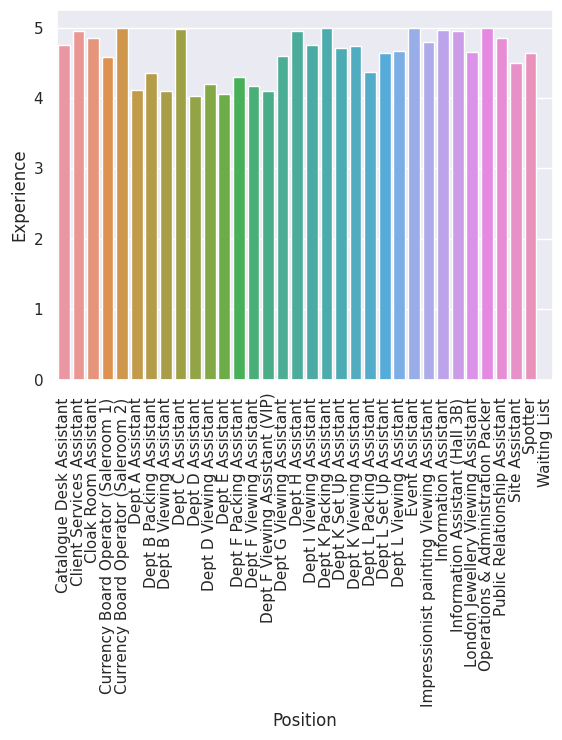

In [45]:
def show_group_by_position():
    df_grouped_by_position = df[["Position", "Experience"]].groupby("Position").mean()
    sns.barplot(data=df_grouped_by_position, x=df_grouped_by_position.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.savefig("fig1.png", bbox_inches="tight")
    plt.show()
    
show_group_by_position()

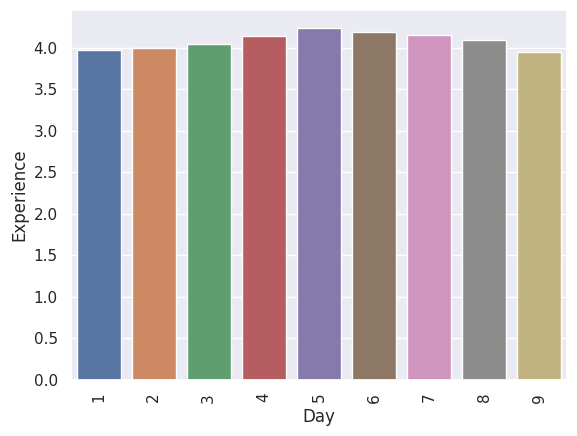

In [46]:
def show_group_by_day():
    df_grouped_by_day = df[["Day", "Experience"]].groupby("Day").mean(numeric_only=True)
    sns.barplot(data=df_grouped_by_day, x=df_grouped_by_day.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.savefig("fig2.png", bbox_inches="tight")
    plt.show()
show_group_by_day()

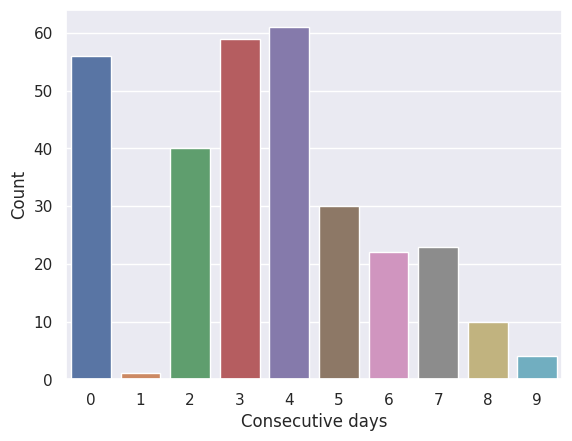

In [53]:
consecutive_days_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0
}

for candidate in df["Candidate Id"].sort_values().unique():
    candidate_df = df[df["Candidate Id"] == candidate]
    candidate_df = candidate_df[candidate_df["Position"] != "Waiting List "]
    days = list(candidate_df["Day"])

    max_consecutive = 0
    consecutive = 0
    for i in range(1, 11):
        if i in days:
            consecutive += 1
        else:
            if consecutive > max_consecutive:
                max_consecutive = consecutive
            consecutive = 0
    consecutive_days_count[max_consecutive] += 1

ax = sns.barplot(x=list(consecutive_days_count.keys()), y=list(consecutive_days_count.values()))
ax.set(xlabel='Consecutive days', ylabel='Count')
plt.savefig("working_days_distribution.png")

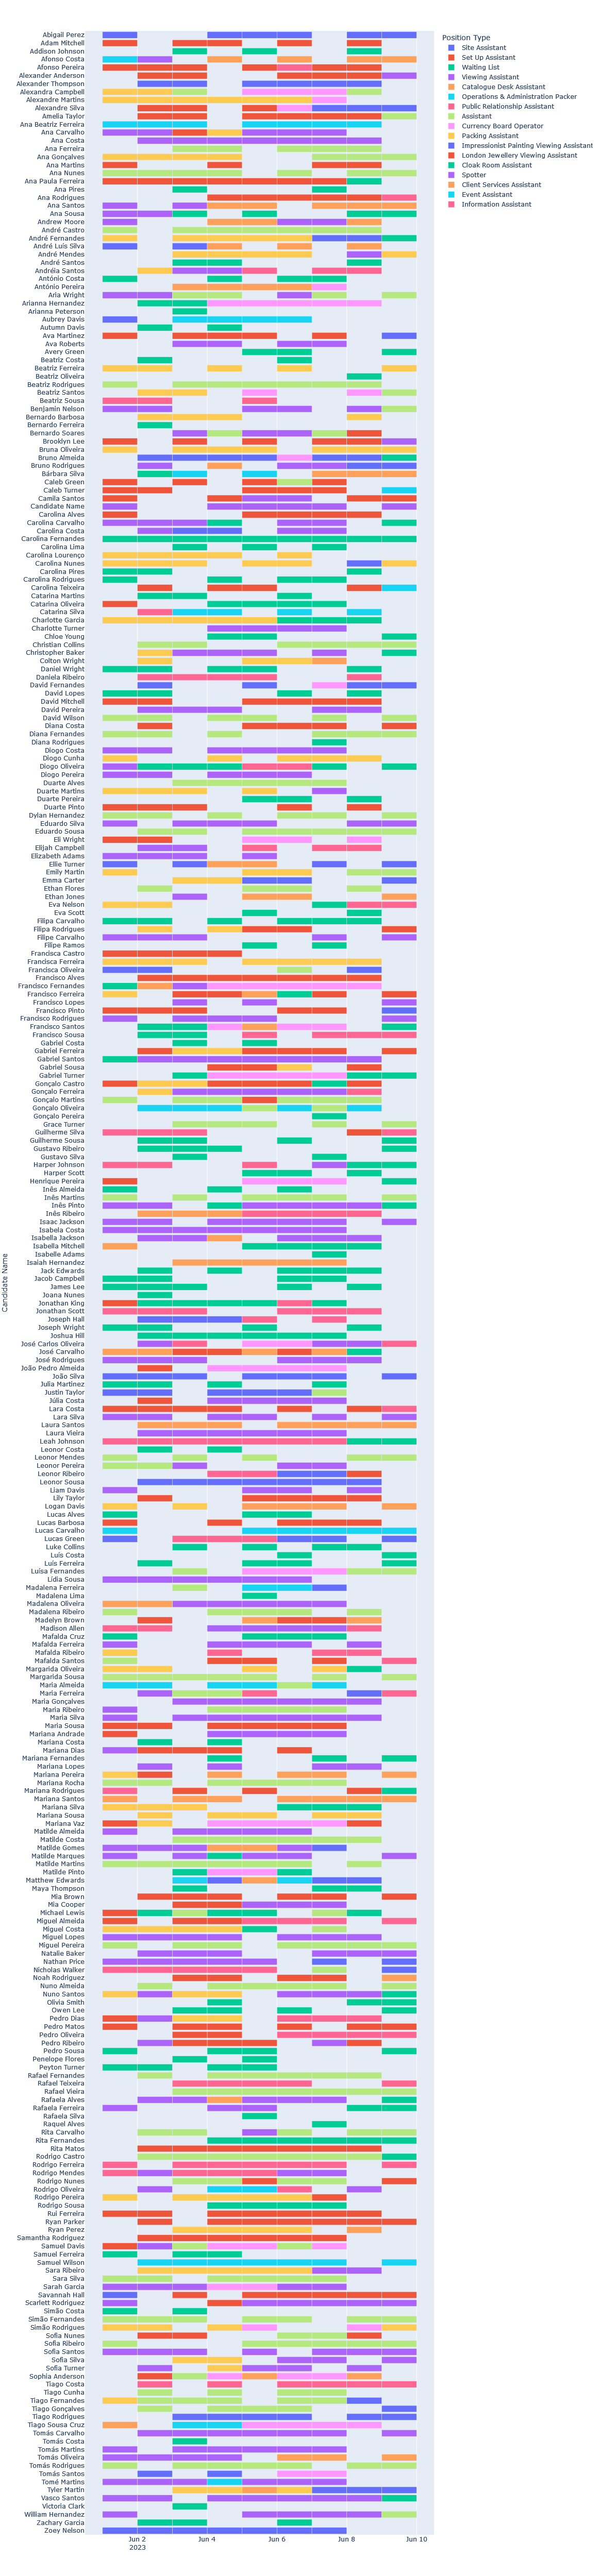

In [49]:
gantt_df = df.copy()
gantt_df["Start"] = gantt_df['Day'].map(lambda x: f"2023-06-{x}")
gantt_df["Finish"] = gantt_df['Day'].map(lambda x: f"2023-06-{x+1}")
gantt_df = gantt_df.sort_values(by=["Candidate Name"])

fig = px.timeline(gantt_df, x_start="Start", x_end="Finish", y="Candidate Name", color="Position Type", height=5000, hover_data=["Position", "Start", "Finish", "Candidate Name", "Experience", "Language Skills", "Presentation Skills"])
fig.update_yaxes(autorange="reversed", categoryorder='array', categoryarray=gantt_df["Candidate Name"])
fig.show()

In [10]:
replacement_df = pd.read_csv("test_replace_metrics.csv")
replacement_df.head()

,Objective,Capability,Time
0,1.846042,4.320000,3.000000
1,1.825026,3.257143,2.571429
2,1.844963,3.100000,2.500000
3,1.818503,3.914286,3.142857
4,1.840090,3.400000,2.714286


In [11]:
replacement_df.describe()

,Objective,Capability,Time
count,900.000000,900.000000,900.000000
mean,1.850854,2.172367,1.644038
std,0.010401,0.857524,0.719751
min,1.799646,0.000000,0.000000
25%,1.845280,1.600000,1.142857
50%,1.850915,2.157778,1.600000
75%,1.855915,2.721250,2.142857
max,1.870534,4.520000,3.500000


In [12]:
# Convert index to day feature
replacement_df["Day"] = replacement_df.index // 100

In [13]:
replacement_df.head()

,Objective,Capability,Time,Day
0,1.846042,4.320000,3.000000,0
1,1.825026,3.257143,2.571429,0
2,1.844963,3.100000,2.500000,0
3,1.818503,3.914286,3.142857,0
4,1.840090,3.400000,2.714286,0


<Axes: xlabel='Day', ylabel='Capability'>

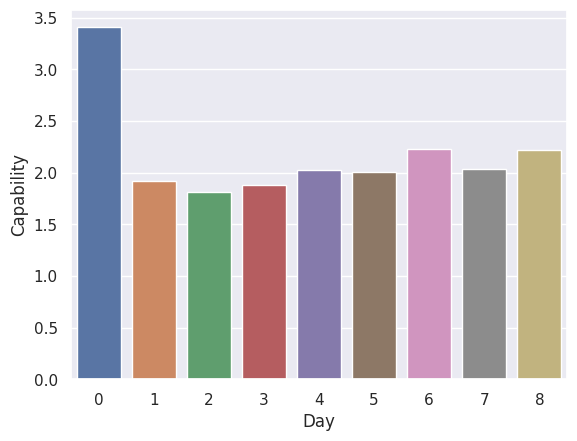

In [14]:
replacement_df_grouped_by_day = replacement_df.groupby("Day").mean()
sns.barplot(data=replacement_df_grouped_by_day, x=replacement_df_grouped_by_day.index, y="Capability")

<Axes: xlabel='Day', ylabel='Time'>

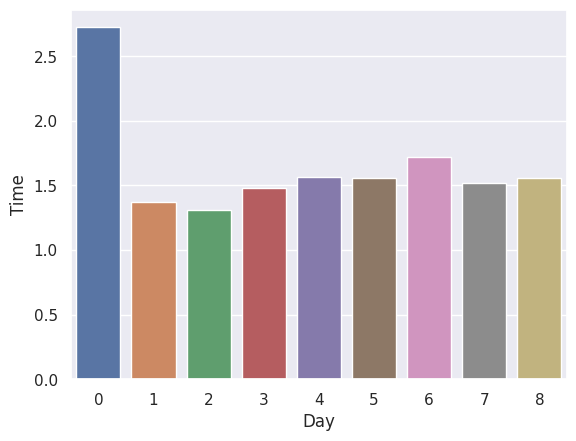

In [15]:
replacement_df_grouped_by_day = replacement_df.groupby("Day").mean()
sns.barplot(data=replacement_df_grouped_by_day, x=replacement_df_grouped_by_day.index, y="Time")